In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [3]:
acc = []
with open('../data/keras_nengo_CNN_epoch50060_output.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for ind, row in enumerate(csv_reader):
        if ind > 43:
            continue
        else:
            acc.append(float(row[1]))

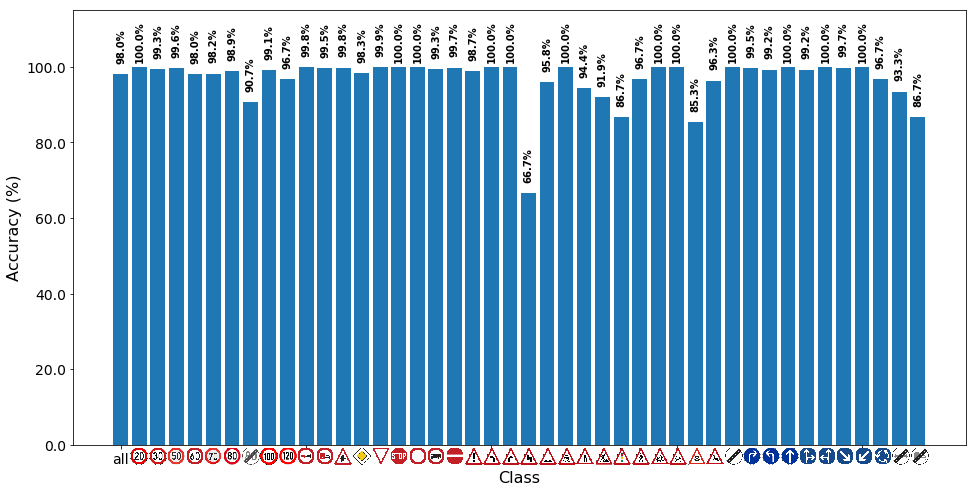

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.bar(np.arange(44), acc, tick_label=None)
ax.set_ylim([0,115])

xs = ax.get_xticks()
xss = ['all']*len(xs)
ax.set_xticklabels(xss, fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=14)
ax.set_xlabel('Class', fontsize=16)
ax.set_ylabel('Accuracy (%)', fontsize=16)


# replace x-ticks with corresponding imgs
for i, v in enumerate(acc):
    ax.text(i-0.25, v+10, '%1.1f%%'%v, fontsize=10, fontweight='bold', rotation=90)


# replace x-ticks with corresponding imgs
size=0.03
xl, yl, xh, yh=np.array(ax.get_position()).ravel()
xl+= 0.035
xh-= size
w=xh-xl
h=yh-yl

for ind in np.arange(44):
    if ind > 0:
        img=plt.imread('../imgs//TrafficSigns/%s.png'%(str(ind-1).zfill(2)))
        xp=xl+w*((ind)/44) #if replace '0' label, can also be calculated systematically using xlim()
        yp=yl-size*0.5-0.02
        # ax.bar(np.arange(43), acc)
        ax1=fig.add_axes([xp-size*0.3, yp, size, size])
        ax1.axison = False
        imgplot = ax1.imshow(img)
# plt.tight_layout()
plt.savefig('/home/flo/git/diss/thesis/imgs/CNN_GTSRB_performance_plot.eps', dpi=1200)
plt.show()